In [1]:
from assets.credentials import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from binance.client import Client

In [2]:
client = Client(api_key=BINANCE_KEY, api_secret=BIANCE_SECRET)

In [20]:
prices = client.get_historical_klines(symbol='BTCUSDT', interval = Client.KLINE_INTERVAL_1MINUTE, start_str=1451628000000, limit = 1000)

In [21]:
prices_array = np.array(prices)
prices_array = prices_array.T

In [22]:
prices_array[0]

array(['1502942400000', '1502942460000', '1502942520000', ...,
       '1613600520000', '1613600580000', '1613600640000'], dtype='<U21')

In [25]:
df = pd.DataFrame()
df['Time'] = prices_array[0].astype('int')
df['Open'] = prices_array[1].astype('float')
df['High'] = prices_array[2].astype('float')
df['Low'] = prices_array[3].astype('float')
df['Close'] = prices_array[4].astype('float')
df['Volume'] = prices_array[5].astype('float')
df['Trades'] = prices_array[8].astype('int')

In [27]:
df.to_csv('assets/BTCUSDT_historical.csv')

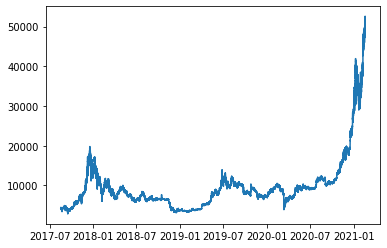

In [41]:
plt.plot(df['Time'], df['High'])

In [36]:
df['Time'] = prices_array[0].astype('int')

In [38]:
df['Time'] = pd.to_datetime(df['Time'], unit='ms')

In [39]:
df

,Time,Open,High,Low,Close,Volume,Trades
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,3
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,3
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1
...,...,...,...,...,...,...,...
1836733,2021-02-17 22:20:00,52173.13,52185.45,52167.10,52170.18,21.472415,1023
1836734,2021-02-17 22:21:00,52170.18,52178.14,52136.09,52156.73,24.210838,968
1836735,2021-02-17 22:22:00,52156.73,52182.86,52136.13,52170.37,20.951211,872
1836736,2021-02-17 22:23:00,52172.19,52183.78,52165.05,52169.52,29.290552,1148


In [40]:
prices_array[0][0]

'1502942400000'